# Imports

In [2]:
# import libraries
import pandas as pd
import numpy as np
import scipy as sp
import networkx as nx
import matplotlib.pyplot as plt

from AEW import AEW
from AEW import AEW_hist
from AEW import generate_W

from pandas import DataFrame
from numpy import linalg as LA
from scipy import sparse
from networkx.algorithms.bipartite import biadjacency_matrix
from networkx.algorithms import bipartite

In [7]:
# import data
df_players = pd.read_excel('players.xlsx')
df_lineups = pd.read_excel('lineups.xlsx')

# Graph analysis

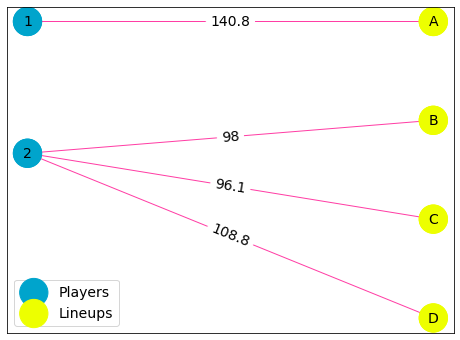

<function matplotlib.pyplot.tight_layout>

In [4]:
# create simple bipartite network
B_discon = nx.Graph()
Nodes_1_discon = ["A", "B", "C", "D"]
Nodes_2_discon  = [1, 2]
B_discon.add_nodes_from(Nodes_1_discon , bipartite=0)
B_discon.add_nodes_from(Nodes_2_discon  , bipartite=1)
B_discon.add_edges_from([("A", 1), ("B", 2), ("C", 2), ("D", 2)])
B_discon[Nodes_1_discon[0]][Nodes_2_discon [0]]['weight'] = 140.8
B_discon[Nodes_1_discon[1]][Nodes_2_discon [1]]['weight'] = 98
B_discon[Nodes_1_discon[2]][Nodes_2_discon [1]]['weight'] = 96.1
B_discon[Nodes_1_discon[3]][Nodes_2_discon [1]]['weight'] = 108.8
nx.is_bipartite(B_discon)

# Plot
plt.figure(figsize=(8, 6)) 

color = bipartite.color(B_discon)
color_dict = {0:'#EDFF00FF',1:'#00A4CCFF'}
color_list = [color_dict[i[1]] for i in B_discon.nodes.data('bipartite')]
pos = {1: (0, 0.7), 2: (0, 0.5), 'A': (0.6, 0.7), 'B': (0.6, 0.55), 'C': (0.6, 0.4), 'D': (0.6, 0.25)}
labels = nx.get_edge_attributes(B_discon,'weight')
nx.draw_networkx(B_discon, pos=pos, node_size=[800,800,800,800,800,800],font_size = 14, node_color=color_list, edge_color='#FF3EA5FF')
nx.draw_networkx_nodes(B_discon, pos=pos, nodelist= [1,2], node_size=[800,800], node_color=color_list[4:6], label='Players')
nx.draw_networkx_nodes(B_discon, pos=pos, nodelist= ['A','B','C','D'], node_size=[800,800,800,800], node_color=color_list[0:4], label='Lineups')
nx.draw_networkx_edge_labels(B_discon, pos=pos, edge_labels=labels,font_size = 14) 
plt.legend(scatterpoints = 1,prop={'size': 14})

plt.show()
plt.tight_layout

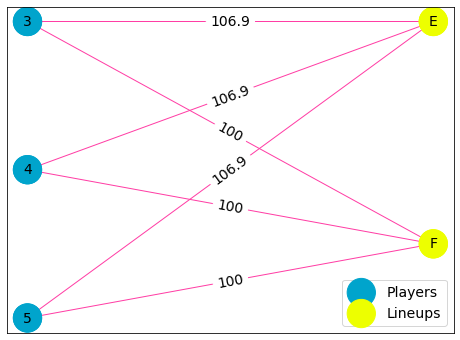

<function matplotlib.pyplot.tight_layout>

In [5]:
# create simple bipartite network
B_discon = nx.Graph()
Nodes_1_discon = ["E", "F"]
Nodes_2_discon = [3, 4, 5]
B_discon.add_nodes_from(Nodes_1_discon , bipartite=0)
B_discon.add_nodes_from(Nodes_2_discon  , bipartite=1)
B_discon.add_edges_from([("E", 3), ("E", 4), ("E", 5), ("F", 3), ("F", 4), ("F", 5)])
B_discon[Nodes_1_discon[0]][Nodes_2_discon [0]]['weight'] = 106.9
B_discon[Nodes_1_discon[1]][Nodes_2_discon [0]]['weight'] = 100
B_discon[Nodes_1_discon[0]][Nodes_2_discon [1]]['weight'] = 106.9
B_discon[Nodes_1_discon[1]][Nodes_2_discon [1]]['weight'] = 100
B_discon[Nodes_1_discon[0]][Nodes_2_discon [2]]['weight'] = 106.9
B_discon[Nodes_1_discon[1]][Nodes_2_discon [2]]['weight'] = 100
nx.is_bipartite(B_discon)

# Plot
plt.figure(figsize=(8, 6)) 

color = bipartite.color(B_discon)
color_dict = {0:'#EDFF00FF',1:'#00A4CCFF'}
color_list = [color_dict[i[1]] for i in B_discon.nodes.data('bipartite')]
pos = {3: (0, 0.7), 4: (0, 0.6), 5: (0, 0.5), 'E': (0.6, 0.7), 'F': (0.6, 0.55)}
labels = nx.get_edge_attributes(B_discon,'weight')
nx.draw_networkx(B_discon, pos=pos, node_size=[800,800,800,800,800],font_size = 14, node_color=color_list, edge_color='#FF3EA5FF')
nx.draw_networkx_nodes(B_discon, pos=pos, nodelist= [3,4,5], node_size=[800,800,800], node_color=color_list[2:5], label='Players')
nx.draw_networkx_nodes(B_discon, pos=pos, nodelist= ['E','F'], node_size=[800,800], node_color=color_list[0:2], label='Lineups')
nx.draw_networkx_edge_labels(B_discon, pos=pos, edge_labels=labels,font_size = 14) 
plt.legend(scatterpoints = 1,prop={'size': 14})

plt.show()
plt.tight_layout

# Players ranking

## OR and PPG

In [8]:
# Inputs for algorithm
# players
players = df_players['PLAYER']
players_names = df_players['PLAYER_FULL_NAME']

# lineups 
lineups = df_lineups["LINEUP"]
ratings = df_lineups["OFFRTG"]

# set initial vector for players
u0_tmp = np.array(df_players['PPG'])
u0 = u0_tmp/u0_tmp.sum()

In [9]:
# Generate W
W = generate_W(players, lineups, ratings)

# Calculate AEW scores ( alpha is for players)
u_OR ,v = AEW(W=W, u0=u0, alpha=0.6, beta=0.6, verbose=True)

Shape of W: (117, 59)
Iteration : 0; top error: 0.26861170945099705; bottom error: 0.08862121126478337
Iteration : 1; top error: 0.040223561927187; bottom error: 0.037553082902811064
Iteration : 2; top error: 0.023639495612711926; bottom error: 0.016517313686161585
Iteration : 3; top error: 0.010983395526120524; bottom error: 0.010438547369266114
Iteration : 4; top error: 0.007835397278202007; bottom error: 0.005584964576109861
Iteration : 5; top error: 0.003693009678048706; bottom error: 0.003649820722844194
Iteration : 6; top error: 0.00284595312537023; bottom error: 0.0020080258665087416
Iteration : 7; top error: 0.0013218496617478912; bottom error: 0.001353141171705893
Iteration : 8; top error: 0.0010844894223782666; bottom error: 0.0007491515385240066
Iteration : 9; top error: 0.0004897933714750036; bottom error: 0.0005226200681926647
Iteration : 10; top error: 0.00042931456254493476; bottom error: 0.000286399036966695
Iteration : 11; top error: 0.00018846159067334228; bottom erro

In [15]:
# Scores for all iterations for two players
# all iterations
U,V = AEW_hist(W=W, u0=u0, alpha=0.6, beta=0.6, max_iter= 20)

# get indices
df_players.loc[df_players['PLAYER_FULL_NAME'].isin(['Russell Westbrook','Tyler Herro'])]

,PLAYER,PLAYER_FULL_NAME,Age,Tm,G,GS,MPG,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PPG,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,OWS/48,DWS,DWS/48,WS,WS/48,OBPM,DBPM,BPM
66,.T. Herro,Tyler Herro,20,MIA,21,5,33.6,706,5.7,13.2,0.433,2.3,6.1,0.375,3.4,7.1,0.483,0.52,2.2,2.6,0.870,0.3,4.8,5.1,3.7,0.4,0.1,2.0,1.5,16.0,12.9,0.557,0.462,0.195,1.2,15.8,8.7,17.9,0.6,0.3,12.3,22.0,0.3,0.020397,0.5,0.033994,0.8,0.053,0.6,-0.8,-0.2
76,.R. Westbrook,Russell Westbrook,31,HOU,8,8,32.8,262,7.4,17.5,0.421,1.0,4.1,0.242,6.4,13.4,0.477,0.45,2.1,4.0,0.531,1.4,5.6,7.0,4.6,1.5,0.3,3.8,2.9,17.9,12.1,0.464,0.236,0.229,4.5,20.2,11.9,25.8,2.2,0.8,16.3,31.5,-0.7,-0.128244,0.4,0.073282,-0.2,-0.043,-1.9,-1.2,-3.2


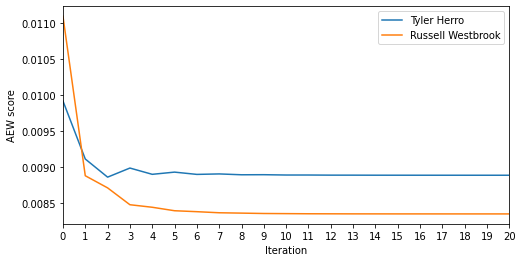

In [16]:
# plot 20 iterations
plt.figure(figsize=(8, 4)) 
x = np.arange(0, 21, 1)
y = U[:,66] # Tyler Herro
y2 = U[:,76] # Russell Westbrook
plt.plot(x,y)
plt.plot(x,y2)

plt.xlim(0,20)
plt.xticks(np.arange(0, 21, step=1)) 
plt.ylabel('AEW score')
plt.xlabel('Iteration')
plt.legend(['Tyler Herro','Russell Westbrook'])

## PT48 and PPG + ORB + AST 

In [ ]:
# Point per 48minutes
lineups_PT48 = df_lineups[["LINEUP", "PTS", "MIN"]]
lineups_PT48["PT48"] = (df_lineups["PTS"]/df_lineups["MIN"])*48
lineups_PT48.head()

In [18]:
# Inputs for Algorithm
# players
players = df_players['PLAYER']
players_names = df_players['PLAYER_FULL_NAME']

# lineups 
lineups = lineups_PT48["LINEUP"]
ratings = lineups_PT48["PT48"]

# set initial vector for players
u0_tmp = np.array(df_players['PPG'] + df_players['ORB']+ df_players['AST'])
u0 = u0_tmp/u0_tmp.sum()

In [19]:
# Generate W
W = generate_W(players, lineups, ratings)

# Calculate AEW scores ( alpha is for players)
u_PT48, v = AEW(W=W, u0=u0, alpha=0.5, beta=0.5)

Shape of W: (117, 59)


## DR and STL + BLK 

$$ Z = mean(X) + (mean(X) - X)$$

In [ ]:
# DR rescale
lineups_DR = df_lineups[['LINEUP','DEFRTG']]
lineups_DR['MEAN'] = np.mean(lineups_DR['DEFRTG'])
lineups_DR['DEFRTG_RESCALED'] = lineups_DR['MEAN'] + (lineups_DR['MEAN'] - lineups_DR['DEFRTG'])
lineups_DR.head()

In [22]:
# Inputs for Algorithm
# players
players = df_players['PLAYER']
players_names = df_players['PLAYER_FULL_NAME']

# lineups 
lineups = lineups_DR["LINEUP"]
ratings = lineups_DR["DEFRTG_RESCALED"]

# set initial vector for players
u0_tmp = np.array(df_players['STL'] + df_players['BLK'])
u0 = u0_tmp/u0_tmp.sum()

In [23]:
# Generate W
W = generate_W(players, lineups, ratings)

# Calculate AEW scores ( alpha is for players)
u_DR, v = AEW(W=W, u0=u0, alpha=0.5, beta=0.5)

Shape of W: (117, 59)


## NETR and PER

$$ Z = (b-a)\frac{X - min(X)}{max(X) - min(X)} + a$$

In [ ]:
# Net Rating Rescaling
lineups_NETRTG = df_lineups[["LINEUP", "NETRTG"]]
lineups_NETRTG = df_lineups[["LINEUP", "NETRTG"]]
lineups_NETRTG['NETRTG_RESCALED'] = (130-80)*((lineups_NETRTG['NETRTG'] - min(lineups_NETRTG['NETRTG'])) / (max(lineups_NETRTG['NETRTG'])- min(lineups_NETRTG['NETRTG']))) + 80
lineups_NETRTG.head()

In [26]:
# Inputs for Algorithm

# players
players = df_players['PLAYER']
players_names = df_players['PLAYER_FULL_NAME']

# lineups 
lineups = lineups_NETRTG["LINEUP"]
ratings = lineups_NETRTG["NETRTG_RESCALED"]

# set initial vector for players
u0_tmp = np.array(df_players['PER'])
u0 = u0_tmp/u0_tmp.sum()

In [27]:
# Generate W
W = generate_W(players, lineups, ratings)

# Calculate AEW scores ( alpha is for players)
u_NR,v = AEW(W=W, u0=u0, alpha=0.5, beta=0.5)

Shape of W: (117, 59)


## Results

In [ ]:
# Display results with names
# set it None to display all rows in the dataframe
pd.set_option('display.max_rows', None)

# select ranking
u = u_NR # u_OR/PT48/DR/NR

# append names to scores
Birank_u = {}   
keys_u = players
values_u = u
for k in range(len(keys_u)):
    Birank_u[keys_u[k]] = values_u[k]
Birank_u = sorted(Birank_u.items(), key=lambda x: x[1], reverse=True)

# result for players
Birank_u
results = pd.DataFrame.from_dict(Birank_u)
results.columns = ['Player','Score']
results